# Support Vector Machines Model with TfidfVectorizer with no stopwords for predicting r/mensrights

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.model_selection import KFold
from sklearn import svm, datasets
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Bring in the libraries needed and the two prepped data files.

In [2]:
fem=pd.read_csv('./data/z_complete/fem.csv')
man=pd.read_csv('./data/z_complete/men.csv')

In [3]:
df=pd.concat([fem,man])
df.shape
#the two files have an identitical structure just concat them without much fussbecause the work was done upstream

(12890, 3)

In [4]:
df = shuffle(df)
#df=df.sample(frac = 0.5)
#Mix the data together because in the early stages I was just using partial bits to get results. SVM takes a very very long time

In [5]:
df.head(2)

,subreddit,created_utc,text
6508,Feminism,1615643162,With the caveat that the other woman might be ...
1929,MensRights,1616959587,I am not trying to insult you you did you re j...


# Modeling

In [6]:
df['subreddit'] = np.where(df['subreddit'] == 'MensRights', 1, 0)
# We will be finding r/MensRights , we need to bianarize the columns 

In [7]:
df.drop(columns='created_utc', inplace=True)
#We do not need the time aspect here at all because that was not ever used

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#bring in the vectorizers
cvec = CountVectorizer(stop_words='english')
#select the vectorizer...Add the stop words so that we can get some actual idea of the most prevelent words
X = df.text
y= df.subreddit
cvec.fit(X)
text_cv = cvec.transform(df.text)
#Transform
text_df = pd.DataFrame(text_cv.toarray(), columns=cvec.get_feature_names())
text_df
#Count vectorizer  produces nasty anomolie of a third class that is 20 in third class outside of the binarized. i looked all over to get an idea but couldnt find it.   

,aacknowledged,aback,abandon,abandoned,abandoning,abbreviation,abby,abc,abdicating,abdication,...,zombies,zone,zoned,zones,zoning,zoo,zoologist,zoom,zora,zygomatic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Understanding our objective we are seeking to demonstrate that ideological preference is visible or not visible in a simple machine learning model and that it can or can not accurately predict what subreddit it came from. As for our baseline, our fundamental assumption is that anything close to .5 would be as good as it calling it out randomly or flipping a coin. 


In [9]:
text_df.subreddit.value_counts()
#cont...the comments from above here they are. This for whatever reason does not happen in the other model which is 

0    12546
1      324
2       20
Name: subreddit, dtype: int64

In [10]:
y.value_counts()
# lucky for me y is still working well so we can proceed.

0    8550
1    4340
Name: subreddit, dtype: int64

In [11]:
X = text_df.drop(columns=['subreddit'])
stan = StandardScaler()
X_stan = stan.fit_transform(X)
#Stan the X and now

In [12]:
X, y = X_stan, y

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_stan,
    y,
    test_size=0.33,
    random_state=42
)
#do the train test split nothing really unorthodox here 

In [14]:
svc = SVC(C= 0.4737368421052632, kernel='linear', degree=2, gamma='scale')
# First parameters courtsey of Lavanya and second parameter 
# from first notebook that actually worked after a very very long time
# judging by end result it is not that bad

In [15]:
svc.fit(X_train, y_train)

SVC(C=0.4737368421052632, degree=2, kernel='linear')

In [16]:
y_pred = svc.predict(X_test)

In [17]:
print(accuracy_score(y_test, y_pred))

0.922425952045134


In [18]:
print(svc.score(X_test, y_test))

0.922425952045134


# Modeling Results

In [19]:
report=classification_report(y_test,y_pred, output_dict=True)
report

{'0': {'precision': 0.9225828262339418,
  'recall': 0.9643109540636042,
  'f1-score': 0.9429854872149274,
  'support': 2830},
 '1': {'precision': 0.9220679012345679,
  'recall': 0.839185393258427,
  'f1-score': 0.8786764705882354,
  'support': 1424},
 'accuracy': 0.922425952045134,
 'macro avg': {'precision': 0.9223253637342549,
  'recall': 0.9017481736610156,
  'f1-score': 0.9108309789015814,
  'support': 4254},
 'weighted avg': {'precision': 0.9224104582980913,
  'recall': 0.922425952045134,
  'f1-score': 0.921458444507732,
  'support': 4254}}

In [20]:
new_report={'Not Mensrights': {'precision': 0.9157645466847091,
  'recall': 0.9640313390313391,
  'f1-score': 0.9392782789729355,
  'support': 2808},
 'Mensrights': {'precision': 0.9221879815100154,
  'recall': 0.8278008298755186,
  'f1-score': 0.8724489795918368,
  'support': 1446},
 'accuracy': 0.917724494593324,
 'macro avg': {'precision': 0.9189762640973622,
  'recall': 0.8959160844534289,
  'f1-score': 0.9058636292823861,
  'support': 4254},
 'weighted avg': {'precision': 0.9179479709342138,
  'recall': 0.917724494593324,
  'f1-score': 0.9165619726952984,
  'support': 4254}}

In [21]:
shmegel = pd.DataFrame(new_report).transpose()
shmegel
#convert to a report for the project 

,precision,recall,f1-score,support
Not Mensrights,0.915765,0.964031,0.939278,2808.000000
Mensrights,0.922188,0.827801,0.872449,1446.000000
accuracy,0.917724,0.917724,0.917724,0.917724
macro avg,0.918976,0.895916,0.905864,4254.000000
weighted avg,0.917948,0.917724,0.916562,4254.000000


Accuracy is the one metric for evaluating classification models in this case we are focused on. So accuracy is the predictions the model got right which can then substantiate the two questions in our presentation with some actual answers. Formally, accuracy has the following definition: Accuracy = Number of True positives over the total number of predictions.

This model perfoms  VERY VERY slow and to be honest the amount of time is insanely slow. 

The model correctly picked out r/mensrights and well enough to actually support my case.

In [22]:
cm = confusion_matrix(y_test, y_pred)
#setup the confusion matrix

In [23]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#set up results

NameError: name 'plt' is not defined

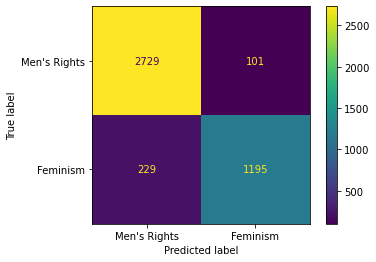

In [24]:
disp = ConfusionMatrixDisplay(cm, display_labels=["Men's Rights",'Feminism'])
disp.plot();
plt.title('svm with countvectorizer and no stopwords for predicting r/mensrights');